## Imports

In [4]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [5]:
df = pd.read_pickle('listings_features.pkl')

In [6]:
df.columns

Index(['host_id', 'host_response_rate', 'host_listings_count',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'number_of_reviews', 'number_of_reviews_ltm',
       'calculated_host_listings_count', 'reviews_per_month',
       'dist_from_center', 'property_type_clean', 'parking', 'price_log',
       'price_RobustScaler'],
      dtype='object')

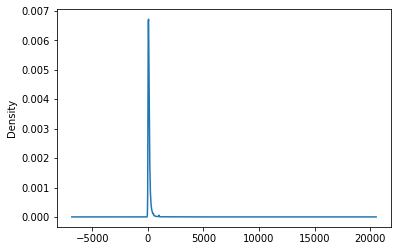

In [7]:
df['price'].plot(kind='kde')

In [8]:
df['price'].skew()

25.02727117606587

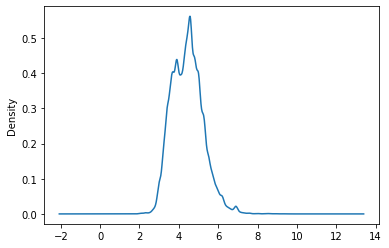

In [9]:
df['price_log'].plot(kind='kde')

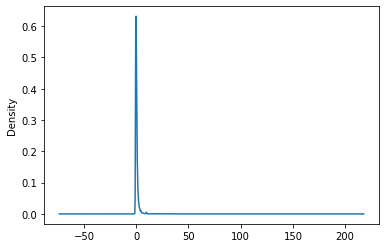

In [10]:
df['price_RobustScaler'].plot(kind='kde')

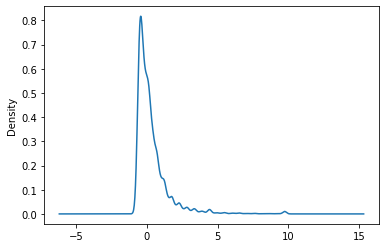

In [11]:
df['price_RobustScaler'][df['price_RobustScaler'] < 10].plot(kind='kde')

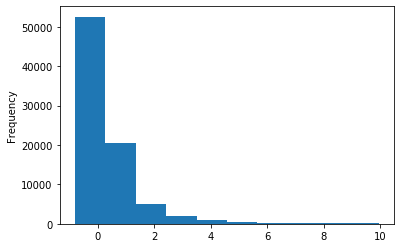

In [12]:
df['price_RobustScaler'][df['price_RobustScaler'] < 10].plot(kind='hist')

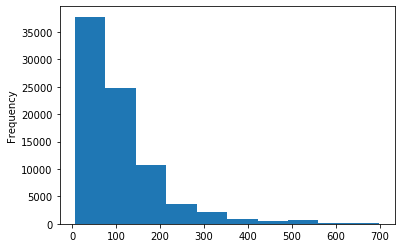

In [13]:
df['price'][df['price'] < 700].plot(kind='hist')

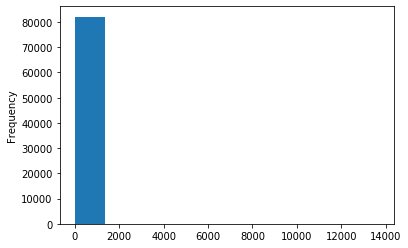

In [14]:
df['price'].plot(kind='hist')

In [15]:
bins = [0,5,10,25,50,100,200,500,1000,2000,5000,10000]

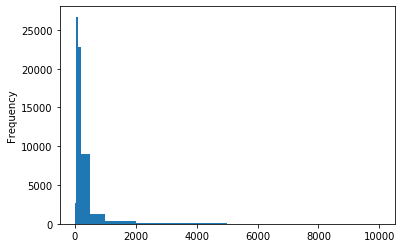

In [16]:
df['price'].plot(kind='hist', bins=bins)

In [17]:
df['price'][df['price'] < 100].count()/df['price'].count()

0.5917538805625449

In [18]:
df['price'][df['price'] < 50].count()/df['price'].count()

0.26713585919362093

In [19]:
df['price'].min()

6.0

In [20]:
df['price'].mean()

122.47788352842504

In [21]:
df['price'].median()

83.0

In [22]:
df['price'].mode()

0    50.0
dtype: float64

In [23]:
df['price'].std()

226.72032515222546

In [24]:
df[df['price'] == df['price'].min()]

,host_id,host_response_rate,host_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,...,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,reviews_per_month,dist_from_center,property_type_clean,parking,price_log,price_RobustScaler
56026,208891534,NaN,1.0,Lewisham,SE13 5AG,51.46531,-0.00865,House,Private room,2,...,60.0,1,1,1,0.16,9.047842,House,True,1.791759,-0.819149


In [25]:
df['price'].max()

13700.0

In [26]:
df['price'].describe()

count    82269.000000
mean       122.477884
std        226.720325
min          6.000000
25%         46.000000
50%         83.000000
75%        140.000000
max      13700.000000
Name: price, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82269 entries, 0 to 83849
Data columns (total 27 columns):
host_id                           82269 non-null int64
host_response_rate                58264 non-null float64
host_listings_count               82222 non-null float64
neighbourhood_cleansed            82269 non-null object
zipcode                           80348 non-null object
latitude                          82269 non-null float64
longitude                         82269 non-null float64
property_type                     82269 non-null object
room_type                         82269 non-null object
accommodates                      82269 non-null int64
bathrooms                         82269 non-null float64
bedrooms                          82269 non-null float64
beds                              82269 non-null float64
price                             82269 non-null float64
security_deposit                  82269 non-null float64
cleaning_fee                      82269 non-

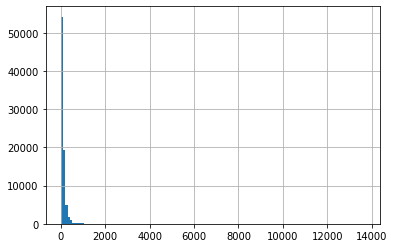

In [28]:
df['price'].hist(bins=130)

In [29]:
df['property_type_clean'].value_counts()

Apartment             55774
House                 17064
Townhouse              2920
Serviced apartment     1887
Other                  1636
Condominium            1090
Bed and breakfast       857
Loft                    694
Guest suite             347
Name: property_type_clean, dtype: int64

In [30]:
df_apartment = df[df['property_type_clean'] =='Apartment'] 

In [31]:
df_house = df[df['property_type_clean'] =='House'] 

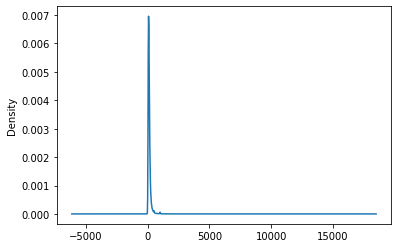

In [32]:
df_apartment['price'].plot(kind='kde')

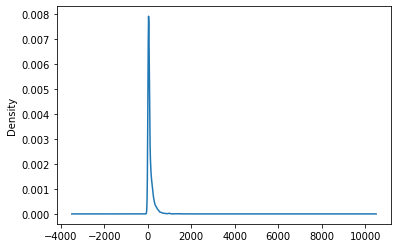

In [33]:
df_house['price'].plot(kind='kde')

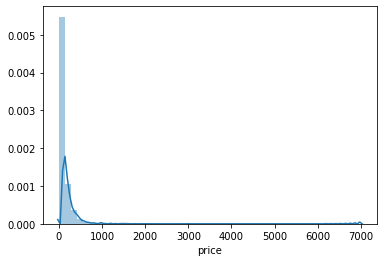

In [34]:
sns.distplot(df_house['price'])

In [35]:
df.sort_values('price',ascending=False)

,host_id,host_response_rate,host_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,...,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,reviews_per_month,dist_from_center,property_type_clean,parking,price_log,price_RobustScaler
57306,200991545,100.0,4.0,Westminster,W1B 4DY,51.51113,-0.13533,Hotel,Private room,7,...,80.0,0,0,4,NaN,1.200458,Other,False,9.525151,144.861702
75962,149362525,77.0,56.0,Westminster,w2 4qr,51.51153,-0.18680,Apartment,Entire home/apt,4,...,0.0,0,0,56,NaN,4.755499,Apartment,False,9.421006,130.446809
75961,149362525,77.0,56.0,Westminster,w2 3na,51.51237,-0.18033,Apartment,Entire home/apt,6,...,0.0,0,0,56,NaN,4.313380,Apartment,False,9.421006,130.446809
80143,149362525,77.0,56.0,Westminster,w2 6qj,51.51828,-0.18280,Apartment,Entire home/apt,5,...,0.0,0,0,56,NaN,4.571585,Apartment,False,9.421006,130.446809
83491,149362525,77.0,56.0,Westminster,w2 4qr,51.51187,-0.18872,Apartment,Entire home/apt,7,...,0.0,0,0,56,NaN,4.889747,Apartment,False,9.421006,130.446809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49776,122480489,NaN,1.0,Merton,CR4 2BU,51.41748,-0.15873,Apartment,Private room,2,...,0.0,0,0,1,NaN,10.644825,Apartment,True,1.945910,-0.808511
51263,17927762,100.0,1.0,Islington,N1 0BL,51.53749,-0.11826,Condominium,Entire home/apt,2,...,0.0,10,5,1,0.75,3.069853,Condominium,True,1.945910,-0.808511
45802,175198291,NaN,1.0,Croydon,CR2,51.35508,-0.06734,House,Shared room,1,...,0.0,0,0,1,NaN,17.556194,House,False,1.945910,-0.808511
49536,41043453,100.0,1.0,Harrow,HA8 5PX,51.59659,-0.28671,House,Private room,2,...,0.0,1,1,1,0.75,15.120198,House,True,1.945910,-0.808511


In [36]:
df.iloc[:,4:15].sort_values('price',ascending=False).head(25)

,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit
57306,W1B 4DY,51.51113,-0.13533,Hotel,Private room,7,3.0,1.0,1.0,13700.0,0.0
75962,w2 4qr,51.51153,-0.18680,Apartment,Entire home/apt,4,1.0,1.0,0.0,12345.0,0.0
75961,w2 3na,51.51237,-0.18033,Apartment,Entire home/apt,6,1.0,2.0,0.0,12345.0,0.0
80143,w2 6qj,51.51828,-0.18280,Apartment,Entire home/apt,5,1.0,1.0,0.0,12345.0,0.0
83491,w2 4qr,51.51187,-0.18872,Apartment,Entire home/apt,7,1.0,2.0,0.0,12345.0,0.0
55900,W1J 5JQ,51.50767,-0.14900,Apartment,Entire home/apt,11,3.0,4.0,7.0,10000.0,0.0
57307,W1B 4DY,51.51127,-0.13481,Hotel,Private room,4,1.0,1.0,1.0,10000.0,0.0
61124,SW1V 1PB,51.49003,-0.14439,Boutique hotel,Private room,2,1.0,1.0,1.0,9999.0,0.0
61125,SW1V 1PB,51.49160,-0.14516,Boutique hotel,Private room,2,1.0,1.0,1.0,9999.0,0.0
61126,SW1V 1PB,51.49221,-0.14583,Boutique hotel,Private room,2,1.0,1.0,1.0,9999.0,0.0


In [37]:
#df['bed_type'].value_counts()

In [38]:
df['room_type'].value_counts()

Entire home/apt    46455
Private room       35130
Shared room          684
Name: room_type, dtype: int64

In [39]:
df['property_type_clean'].value_counts()

Apartment             55774
House                 17064
Townhouse              2920
Serviced apartment     1887
Other                  1636
Condominium            1090
Bed and breakfast       857
Loft                    694
Guest suite             347
Name: property_type_clean, dtype: int64

In [40]:
df2 = df[(df['property_type'] == 'House') & (df['room_type'] == 'Entire home/apt')]

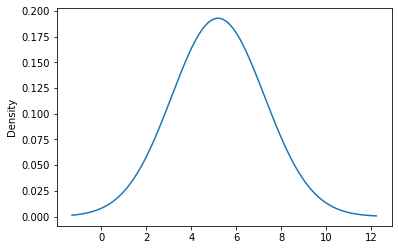

In [41]:
df2['price_log'].plot(kind='kde',bw_method=3)

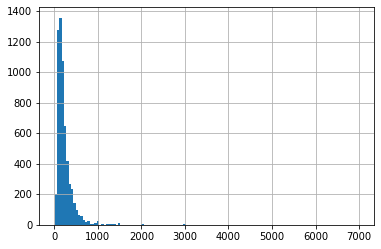

In [42]:
df2['price'].hist(bins=130)

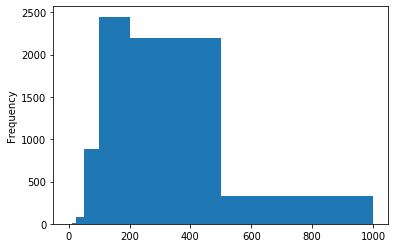

In [43]:
bins =[0,5,10,25,50,100,200,500,1000]
df2['price'].plot(kind='hist', bins=bins)

In [44]:
df2.columns

Index(['host_id', 'host_response_rate', 'host_listings_count',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'number_of_reviews', 'number_of_reviews_ltm',
       'calculated_host_listings_count', 'reviews_per_month',
       'dist_from_center', 'property_type_clean', 'parking', 'price_log',
       'price_RobustScaler'],
      dtype='object')

In [45]:
X = df2[['accommodates', 'bathrooms', 'bedrooms', 'beds','dist_from_center']] 
y = df2['price']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

C:\Users\Miheer\AC3\envs\yuvoh\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     344.2
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:07:41   Log-Likelihood:                -41045.
No. Observations:                6012   AIC:                         8.210e+04
Df Residuals:                    6006   BIC:                         8.214e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               66.8488     10.034      6.662      0.000      47.179      86.518
accommodates        13.6316      2.223      6.132      0.000       9.274      17.989
bathrooms           93.7487      4.076     23.001      0.000      85.759     101.739
bedrooms             3.9142      4.318      0.906      0.365      -4.551      12.380
beds                -6.8966      2.744     -2.513      0.012     -12.277      -1.517
dist_from_center   -10.9313      0.703    -15.539      0.000     -12.310      -9.552
==============================================================================
Omnibus:                    10473.837   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15256175.331
Skew:                          12.090   Prob(JB):                         0.00
Kurtosis:                     248.598   Cond. No.                         43.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""